<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2018 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

<h4 align='center'> Integrantes: Pablo Aguirre, Rol: 201473555-3; Jorge Aliste, Rol: 201473538-3 </h4>

<a id="primero"></a>
## 1. Aprendizaje con regresión lineal.

El modelo de regresión lineal  es una combinación lineal entre variables independientes para obtener otra variable, dependiente de éstas. Lo cual puede resultar bastante simple, pero, hoy en día, ha podido ser aplicado a varios problemas con buenos resultados, como predicción en finanzas y en medicina. Sin embargo, también puede ser un medio para aplicar un modelo más grande, por ejemplo utilizarlo para que, con el resuido, detectar *outliers*, rellenar vacíos/datos incompletos o aprender un *score* para ranquear objetos, lo que haremos en esta sección.

<img src="http://chanakya.ca/wp-content/uploads/2018/05/EstimateMultipleLinearRegressionCoefficientsExample_01.png" height="15%" />


El problema de *learning to rank* es aplicado comúnmente en *Information Retrieval* (IR). Sin embargo, el aprender ésta función puede ser crucial para modelar la importancia de distintos objetos.  


En esta actividad trabajaremos con el problema de predecir el *ranking* mundial de una Universidad en base a distintas características de ésta (dataset *World University Rankings*, a través del siguiente __[link](https://www.kaggle.com/mylesoneill/world-university-rankings)__) en la plataforma de *Kaggle*. En este problema el *ranking* es una medición de qué tan buena es la universidad e intentaremos predecirla a través un modelo simple de regresión lineal. En particular, dentro de los miles de diferentes sistemas de rankings, nacionales e internacionales, entre los cuales comúnmente existen desacuerdos entre ellos, trabajaremos con el ranking ampliamente considerado como uno de las más influyentes y ampliamente observadas: *Times Higher Education World University* .


> a) Cargue los datos a analizar, descargándolos desde la plataforma como se indicó, en formato *dataframe pandas*. Descríbalos adecuadamente, ya sea la variable dependiente o las independientes, si es que lo son.
```python
import pandas as pd
df = pd.read_csv("world-university-rankings/timesData.csv")
df.shape
df.describe()
```

> b) Debido a la estructura será necesario realizar un leve pre-proceso. Existen vacíos entre los datos o valores '-', por lo que será necesario eliminarlos (*o si piensa una mejor manera de manejar ésto puede hacerlo, se verá reflejado en su nota*). Además de ésto deje los datos con *score unkown* o '-' en un conjunto *target* separado, *unlabeled data* (éste será el objetivo del entrenamiento) ¿Cuántos datos quedan en cada conjunto? 
```python
def convertToInt(x):
    try:
        x = int(x)
    except:
        x = 0
    return x
df.dropna(axis=0,inplace=True,how='any') #borra nan
df["total_score"] = df3["total_score"].apply(lambda x: x.replace('-','unknown')) #rellena 
df = df[~(df == '-').any(axis=1)] #elimina filas con valores nulos
...
nuevo_df  = pd.get_dummies(df, columns=["country"]) #column to categorical
....
nuevo_df['female'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[0].apply(convertToInt)
nuevo_df['male'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[1].apply(convertToInt)
nuevo_df['female_male_ratio'] =  np.where(nuevo_df['male'] == 0, 0, nuevo_df['female']/nuevo_df['male']) #si no hay (rellena 0) 
nuevo_df['num_students'] = nuevo_df['num_students'].apply(lambda x: int(str(x).replace(',','')))
nuevo_df['international_students'] = nuevo_df['international_students'].apply(lambda x: int(str(x).replace('%','')))
print(nuevo_df.shape)
...
df_test = nuevo_df[nuevo_df["total_score"]=='unknown']  #para predecir al final
nuevo_df =  nuevo_df[nuevo_df["total_score"]!='unknown'] #elimina unknown rank..
print(nuevo_df.shape)
nuevo_df.head()
```

> c) Cree las matrices de cada conjunto con las que trabajará. Además de ésto separe el conjunto de pruebas fijo que se utilizará, recuerde que éste no puede ser utilizado. Si estima conveniente también cree conjunto de validación.
```python
Y = nuevo_df['total_score'].values
X = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).values
X_test = df_test.drop(["total_score","world_rank","university_name"],axis=1).values
Y = Y.astype('float32')
X = X.astype('float32')
X_test = X_test.astype('float32')
X.shape
...
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
...
validation_set = #if you want to create val!
```

> d) Normalice los datos antes de trabajar. Explique la importancia/conveniencia de realizar ésto.
```python
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
```

> e) Realice una regresión lineal de mı́nimos cuadrados básica. Mida el residuo de cada predicción en cada dato y haga un gráfico de éste ¿Qué indica lo observado?
```python
from sklearn.linear_model import LinearRegression as LR
linreg = LR(fit_intercept=True, n_jobs=1)
linreg.fit(X_train_scaled,y_train)
...
import seaborn as sns
res = y_train-linreg.predict(X_train_scaled)
sns.distplot(res)
```

> f) Construya una tabla con los pesos, Z-score y F-score correspondientes a cada predictor (variable), compare estos valores. ¿Qué sucede si hacemos un raking de los atributos en base al peso obtenido en la regresión? Compare y comente ¿Qué variables están más correlacionadas con la respuesta? Si usáramos un nivel de significación del 5%. ¿Qué es lo que observa y cuál puede ser la causa?

> g) Calcule la información mútua de los distintos predictores (variables) con respecto a la variable *output* o *target*. Comente con lo calculado anteriormente y se le parece razonable.
```python
from sklearn.feature_selection import mutual_info_regression
minfo_predictor = mutual_info_regression(X,y)
```

> h)  Construya una función que implemente *Forward Step-wise Selection* (FSS). Es decir, partiendo con un modelo sin predictores (variables), agregue un predictor a la vez, re-ajustando el modelo de regresión en cada paso. Para seleccionar localmente una variable, proponga/implemente un criterio distinto al utilizado en el código de ejemplo. Construya un gráfico que muestre el error de entrenamiento y el error de pruebas como función del número de variables en el modelo. Ordene el eje $x$ de menor a mayor.
```python
def fss(x, y, names_x, k = 10000):
    p = x.shape[1]-1
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LR(fit_intercept=True, n_jobs=1)
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            predictions_train = model.fit(x_train, y).predict(x_train)
            residuals_train = predictions_train - y
            mse_candidate = np.mean(np.power(residuals_train, 2))
            score_candidates.append((mse_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        remaining.remove(best_candidate)
        selected.append(best_candidate)
        print "selected = %s ..."%names_x[best_candidate]
        print "totalvars=%d, mse = %f"%(len(indexes),best_new_score)
    return selected
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
fss(X_train_scaled,y_train,names_regressors)
```

> i) Ajuste un modelo lineal utilizando “*Ridge Regression*”, es decir, regularizando con la norma $l_2$. Utilice valores del parámetro de regularización $\lambda$ en el rango [$10^0, 10^6$], variando si estima conveniente. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Deje un gráfico sólo para analizar los coeficientes de los países. Describa lo que observa.
```python
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
alphas_ = np.logspace(0,6,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" not in label:
        plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend()
plt.show()
...#modify
if "country" in label:
    plt.plot(alphas_, y_arr, label=label)
plt.title('Regularization Path RIDGE of country coefs')
```

> j) Ajuste un modelo lineal utilizando el método “*Lasso*”, es decir, regularizando con la norma $l_1$. Utilice valores del parámetro de regularización $\lambda$ en el rango [$10^{-2},10^3$]. Para obtener el código, modifique el ejemplo anterior. Construya un gráfico que muestre los coeficientes obtenidos como función del parámetro de regularización. Describa lo que observa. ¿Es más efectivo *Lasso* para seleccionar atributos?
```python
from sklearn.linear_model import Lasso
alphas_ = np.logspace(-2,3,base=10)
model = Lasso(fit_intercept=True)
...
country_alphas_ = np.logspace(-5,0,base=10)
```
> k) Escogiendo uno de los dos métodos regularizadores anteriores, especificando el porqué, construya un gráfico que muestre el error de entrenamiento y el de pruebas como función del parámetro de regularización. Discuta lo que  observa.
```python
alphas_ = #choose it
coefs = []
model = #choose it
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    yhat_train = model.predict(X_train_scaled)
    yhat_test = model.predict(X_test_scaled)
    mse_train.append(np.mean(np.power(yhat_train - y_train, 2)))
    mse_test.append(np.mean(np.power(yhat_test - y_test, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge/lasso')
ax.plot(alphas_,mse_test,label='test error ridge/lasso')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()
```

> l) Estime el valor del parámetro de regularización en **alguno** de los modelos anteriores haciendo uso de la técnica validación cruzada con un número de folds igual a $K= 5$ y $K = 10$. Recuerde que para que la estimación sea razonable, en cada configuración (*fold*) deberá reajustar los pesos del modelo. Mida el error real del modelo (ésto es sobre el conjunto de pruebas). Debido a la escala del error puede utilizar auxiliarmente *MAE* como métrica de desempeño. Compare y concluya.
```python
yhat_test = linreg.predict(X_test_scaled)
mse_test = np.mean(np.power(yhat_test - y_test, 2))
from sklearn.model_selection import KFold
K=10
kf = KFold(n_splits=K)
mse_cv = 0
for train, val in kf.split(X_train_scaled):
    linreg = LR(fit_intercept=True, n_jobs=1)
    linreg.fit(X_train_scaled[train], y_train[train])
    yhat_kfold_val = linreg.predict(X_train_scaled[val])
    mse_fold = np.mean(np.power(yhat_kfold_val - y_train[val], 2))
    mse_cv += mse_fold
mse_cv = mse_cv / K
...#or MAE
mae_fold = np.mean(np.abs(yhat_kfold_val - y_train[val]))
```

> m) Con el modelo que se piense que es el mejor, en base a todo lo experimentado. Realice el *ranking* de las universidades del que no se tienen etiquetas (*unlabeled data* o *target data*) a través de predecir los datos que se dejaron como *pruebas* y ordenar su score en el *dataframe*.
```python
df_test["total_score"] = model.predict(X_test_scaled) #predict score
...#armar un raking
univ_chilenas = df_test[df_test["country_Chile"]==1]
rannking_univ_ch = univ_chilenas.sort_values(by="total_score",ascending=False)
ranking = 1
for index,row in rannking_univ_ch.iterrows():
    print("%d - Institucion: %s" %(ranking,row["university_name"]))
    ranking+=1
```

a) Se descargan y cargan los datos del archivo timesData.csv.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("timesData.csv")
print(df.shape)
print(df.describe)

(2603, 14)
<bound method NDFrame.describe of      world_rank                                    university_name  \
0             1                                 Harvard University   
1             2                 California Institute of Technology   
2             3              Massachusetts Institute of Technology   
3             4                                Stanford University   
4             5                               Princeton University   
5             6                            University of Cambridge   
6             6                               University of Oxford   
7             8                 University of California, Berkeley   
8             9                            Imperial College London   
9            10                                    Yale University   
10           11              University of California, Los Angeles   
11           12                              University of Chicago   
12           13                           Joh

En la vista de los datos, se tiene el lugar en el ranking de la universidad, la cual sería una variable dependiente de otros parámetros ya que a partir de estos se determina el lugar de la universidad en el ranking. Luego, están las variables "nombre de la univerdad", "ciudad", "teaching", "international", "research", "citations", "income", "num_students", "student_staff_ratio", "international_students", "female_male_ratio" y "year", las cuales son variables independientes ya que ninguna de estas se obtiene a partir de una variable del dataset, todas estas variables son características de cada universidad en particular. Finalmente, la variable "total_score" es una variable dependiente ya que se obtiene a partir de las otras variables. Se puede notar que se tienen datos de 2603 universidades.

b) En esta sección primero se define la función para convertir una variable a entero:

In [2]:
# Función que convierte una variable x en un entero si es posible. Si no, lo transforma a 0.
def convertToInt(x):
    try:
        x = int(x)
    except:
        x = 0
    return x

Luego, se eliminan las filas que contienen elementos vacios (Nan) y se rellanan los cambos con "-" por el valor "unknown".

In [3]:
# Borra directamente las filas que contienen en cualquier casilla un valor nan
print("Cantidad de universidades antes de primer filtrado: ", df.shape[0])
df.dropna(axis=0,inplace=True,how='any')
print("Cantidad de universidades después de primer filtrado: ", df.shape[0])

# Cualquier casilla que contenga "-" en la columna de "total_score" será remplazada por "unknown"
df["total_score"] = df["total_score"].apply(lambda x: x.replace('-','unknown')) 
# elimina filas con valores nulos "-".
df = df[~(df == '-').any(axis=1)]
print("Cantidad de universidades después de segundo filtrado: ", df.shape[0])

Cantidad de universidades antes de primer filtrado:  2603
Cantidad de universidades después de primer filtrado:  2362
Cantidad de universidades después de segundo filtrado:  2174


Con el primer filtrado, se tiene que 241 universidades poseen datos de tipo nan, dejando la cantidad de universidades en 2362. Luego, al aplicar el filtrado para quitar las universidades que tienen como dato "-" en alguna de sus variables, la cantidad se universidades útiles para el estudio se reduce a 2174.

Para un mejor análisis, se convierte la variable "country" en variables categorícas. Así, se le asocia el valor 1 si la universidad se encuentra en la ciudad indicada en la columna. 

In [4]:
nuevo_df  = pd.get_dummies(df, columns=["country"]) #column to categorical
nuevo_df

,world_rank,university_name,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,...,country_Sweden,country_Switzerland,country_Taiwan,country_Thailand,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States of America
1,2,California Institute of Technology,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,...,0,0,0,0,0,0,0,0,0,1
2,3,Massachusetts Institute of Technology,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,...,0,0,0,0,0,0,0,0,0,1
3,4,Stanford University,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,...,0,0,0,0,0,0,0,0,0,1
5,6,University of Cambridge,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,...,0,0,0,0,0,0,0,0,1,0
6,6,University of Oxford,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,...,0,0,0,0,0,0,0,0,1,0
8,9,Imperial College London,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,...,0,0,0,0,0,0,0,0,1,0
12,13,Johns Hopkins University,80.9,58.5,89.2,92.3,100.0,86.4,"15,128",3.6,...,0,0,0,0,0,0,0,0,0,1
13,14,Cornell University,82.2,62.4,88.8,88.1,34.7,83.9,"21,424",10.2,...,0,0,0,0,0,0,0,0,0,1
15,15,University of Michigan,83.9,53.3,89.1,84.1,59.6,83.4,"41,786",9.0,...,0,0,0,0,0,0,0,0,0,1
18,19,University of Pennsylvania,71.8,32.9,82.7,93.6,43.7,79.5,"20,376",6.5,...,0,0,0,0,0,0,0,0,0,1


Se crea la columna "female" y "male" con el fin de separar el ratio y obtener el valor númerico de la proporción de mujeres y hombres. Luego, se actualiza la columna "female_male_ratio" con el calculo númerico del ratio

In [5]:
nuevo_df['female'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[0].apply(convertToInt)
nuevo_df['male'] = nuevo_df['female_male_ratio'].str.split(':', expand=True)[1].apply(convertToInt)
# Ahora la columna "female_male_ratio" deja de ser un string y contiene el valor númerico de la razón entre mujeres y hombres.
nuevo_df['female_male_ratio'] =  np.where(nuevo_df['male'] == 0, 0, nuevo_df['female']/nuevo_df['male']) #si no hay (rellena 0)
nuevo_df

,world_rank,university_name,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,...,country_Taiwan,country_Thailand,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States of America,female,male
1,2,California Institute of Technology,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,...,0,0,0,0,0,0,0,1,33,67
2,3,Massachusetts Institute of Technology,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,...,0,0,0,0,0,0,0,1,37,63
3,4,Stanford University,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,...,0,0,0,0,0,0,0,1,42,58
5,6,University of Cambridge,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,...,0,0,0,0,0,0,1,0,46,54
6,6,University of Oxford,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,...,0,0,0,0,0,0,1,0,46,54
8,9,Imperial College London,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,...,0,0,0,0,0,0,1,0,37,63
12,13,Johns Hopkins University,80.9,58.5,89.2,92.3,100.0,86.4,"15,128",3.6,...,0,0,0,0,0,0,0,1,50,50
13,14,Cornell University,82.2,62.4,88.8,88.1,34.7,83.9,"21,424",10.2,...,0,0,0,0,0,0,0,1,48,52
15,15,University of Michigan,83.9,53.3,89.1,84.1,59.6,83.4,"41,786",9.0,...,0,0,0,0,0,0,0,1,48,52
18,19,University of Pennsylvania,71.8,32.9,82.7,93.6,43.7,79.5,"20,376",6.5,...,0,0,0,0,0,0,0,1,51,49


Ahora, se transforma la columna cantidad de alumnos para que sea un valor númerico, al igual que el porcentaje de alumnos extranjeros.

In [6]:
nuevo_df['num_students'] = nuevo_df['num_students'].apply(lambda x: int(str(x).replace(',','')))
nuevo_df['international_students'] = nuevo_df['international_students'].apply(lambda x: int(str(x).replace('%','')))
print(nuevo_df.shape)

(2174, 82)


Cabe notar que no se ha filtrado ninguna universidad en el proceso, pero si ha aumentado considerablemente la cantidad de variables que posee cada fila.

Finalmente, se separa el conjunto de entrenamiento con el de prueba. Las universidades con "total_score = unknown" formarán parte del grupo de prueba, mientras que los que restan serán parte del entrenamiento.

In [7]:
df_test = nuevo_df[nuevo_df["total_score"]=='unknown']  #para predecir al final
nuevo_df =  nuevo_df[nuevo_df["total_score"]!='unknown'] #elimina unknown rank..
print(nuevo_df.shape, df_test.shape)
nuevo_df.head()

(954, 82) (1220, 82)


,world_rank,university_name,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,...,country_Taiwan,country_Thailand,country_Turkey,country_Uganda,country_Ukraine,country_United Arab Emirates,country_United Kingdom,country_United States of America,female,male
1,2,California Institute of Technology,97.7,54.6,98.0,99.9,83.7,96.0,2243,6.9,...,0,0,0,0,0,0,0,1,33,67
2,3,Massachusetts Institute of Technology,97.8,82.3,91.4,99.9,87.5,95.6,11074,9.0,...,0,0,0,0,0,0,0,1,37,63
3,4,Stanford University,98.3,29.5,98.1,99.2,64.3,94.3,15596,7.8,...,0,0,0,0,0,0,0,1,42,58
5,6,University of Cambridge,90.5,77.7,94.1,94.0,57.0,91.2,18812,11.8,...,0,0,0,0,0,0,1,0,46,54
6,6,University of Oxford,88.2,77.2,93.9,95.1,73.5,91.2,19919,11.6,...,0,0,0,0,0,0,1,0,46,54


El grupo de prueba se compone de 1220 universidades, mientras que el grupo de entrenamiento se compone de 954 universidades.

c) Para formar la matriz de entrenamiento: los valores de Y se obtienen de la columna "total_score" del conjunto de entrenamiento, mientras que los valores de x son todas las otras variables sin contar "total_score", "world_rank" y "university_name". Para el conjunto de prueba del modelo, se utilizan los valores de las variables del conjunto de prueba del modelo, formando la matriz x de clasificación.

In [8]:
# f(x)
Y = nuevo_df['total_score'].values
# x
X = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).values
# x para las futuras pruebas
X_classification = df_test.drop(["total_score","world_rank","university_name"],axis=1).values
# Se transforma x e y en el mismo tipo.
Y = Y.astype('float32')
X = X.astype('float32')
X_classification = X_classification.astype('float32')
X.shape

(954, 79)

Ahora se crearán los conjuntos de entrenamiento, validación y prueba, los cuales se compondrán del 60%, 20% y 20% del dataset respectivamente. El conjunto de validación se utilizará debido a que son varios los métodos que se utilizaran y se deben comparar.

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)
print(X_train.shape, X_test.shape, X_val.shape)

(667, 79) (143, 79) (144, 79)


d) Ahora, se deben normalizar todos los datos antes de trabajar. Esto se realiza para que los datos tengan una escala común. Esto permite que no haya una distorción en los rangos de las variables y que escalas muy grandes o pequeñas no alteren el modelo.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)
X_train_scaled

array([[-0.6402554 , -0.24891855, -1.112133  , ..., -0.6873197 ,
        -1.8187234 ,  1.8187234 ],
       [-0.91020244,  1.6662637 , -0.7371657 , ..., -0.6873197 ,
         1.119723  , -1.119723  ],
       [-0.71824   , -0.2632824 , -1.1737714 , ...,  1.4549338 ,
         0.04229263, -0.04229263],
       ...,
       [-0.93419784,  1.5082611 , -0.52656776, ..., -0.6873197 ,
         0.23818906, -0.23818906],
       [-0.8382165 , -1.5081508 , -0.8861254 , ...,  1.4549338 ,
        -0.5453967 ,  0.5453967 ],
       [-0.36430958,  1.642324  ,  0.00763219, ..., -0.6873197 ,
        -0.1536038 ,  0.1536038 ]], dtype=float32)

e) Se realiza la regresión lineal de mínimos cuadrados sobre el conjunto de entrenamiento. Además, se realiza el gráfico que relaciona los residuos al comparar el valor real con la predicción del modelo.

D:\Program Files\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


(79,)

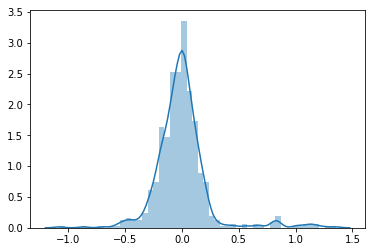

In [18]:
from sklearn.linear_model import LinearRegression as LR
linreg = LR(fit_intercept=True, n_jobs=1)
linreg.fit(X_train_scaled,y_train)
import seaborn as sns
res = y_train-linreg.predict(X_train_scaled)
sns.distplot(res)
linreg.coef_.shape

El gráfico anterior, indica que la distribución del residuo es muy similar a una distribución normal con media cercana a 0. Esta distribución es un requisito para poder utilizar regresión lineal.

f) En esta sección se calcula el peso, f-score y z-score de cada variable para así tener una idea del peso de cada una. Para el peso de las variables simplemente se obtienen los coeficientes de la refresión lineal. Para el z-score se importa la función stats de la librería scipy y se utiliza sobre la matriz de variables. Luego, se obtiene el promedio del z-score de cada variable. Finalmente, al estar trabajando con una regresión lineal, el f_score no tiene sentido ya que este se utiliza para problemas de clasificación, es decir, se necesitan resultados de valor entero y en este problema se obtienen resultados continuos.

In [12]:
# El peso corresponde a los coeficientes de la regresión lineal
pesos_variables = linreg.coef_
####
from scipy import stats
matrizZscore = stats.zscore(X_train_scaled, axis=1, ddof=1)
zScore = np.mean(matrizZscore, axis = 0)
print("Pesos")
print(pesos_variables)
print("zScore")
print(zScore)

Pesos
[ 4.98415470e+00  1.39408684e+00  5.88327122e+00  4.72190809e+00
  5.99669456e-01 -2.45364308e-02 -5.31864166e-03  2.47411728e-02
  3.70593071e-02 -4.65892851e-02  5.24985898e+04 -9.69268738e+02
 -4.55470581e+02  3.47568789e+04 -7.43554871e+02 -2.44392853e+02
 -8.80871094e+02 -1.47864795e+04 -4.55465881e+02  2.49351406e+04
 -1.57559189e+04 -5.23823926e+03 -6.17872925e+02 -1.72873413e+02
  1.93805020e+04 -3.45090942e+02 -7.80488953e+02 -1.09767798e+03
 -8.18620166e+03 -5.94092224e+02  3.63903394e+03  2.19993730e+04
  1.89530078e+04  6.35163867e+03  8.26738867e+03 -2.99089172e+02
 -2.99092926e+02 -5.94124512e+02  1.30790195e+04  1.46825430e+04
 -1.36012559e+04 -5.87834570e+03 -1.72911942e+02  1.70241172e+04
 -5.31047266e+03 -4.37980859e+03  4.30837891e+02 -1.09768079e+03
 -3.45080750e+02  0.00000000e+00 -2.99069397e+02 -1.95312500e-03
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -2.99077057e+02  0.00000000e+00 -1.72930756e+02  0.00000000e+00
  0.00000000e+00 -5

Si tomamos en consideración el peso de las variables, se tiene las siguientes variables tienen el mayor peso nombradas por su índice: 14, 17, 21, 23, 24, 28, 35, 36, 42, 43, 44 y 47. Todas estas tienen un factor de $10^{4}$ por lo que aportan bastante al resultado (de manera positiva o negativa). Estos son principalmente países por lo que el mayor peso estaría dado por el país al cual pertenece la universidad. Tomando en cuenta el zScore la variable 77 es la que más peso tiene, la cual corresponde a el país de Estados Unidos, luego le sigue el país de Reino Unido y finalmente la variable "citations". Estas tres variables son las que tienen más peso según zScore y contrasta con el peso de la regresión lineal en que no solo países son importantes, si no que también otras variables.

g) En esta sección se calcula la información mutua de las variables.

In [13]:
from sklearn.feature_selection import mutual_info_regression
minfo_predictor = mutual_info_regression(X,Y)
minfo_predictor

array([0.88475048, 0.07342921, 0.90198744, 0.31450078, 0.14326799,
       0.27663969, 0.29031699, 0.3476839 , 0.30352397, 0.23517227,
       0.10448997, 0.14714953, 0.1120113 , 0.11642848, 0.13180948,
       0.12705352, 0.1117428 , 0.10202437, 0.123708  , 0.10822283,
       0.14585819, 0.10532162, 0.13457497, 0.12589165, 0.12375321,
       0.13778135, 0.16224231, 0.11279505, 0.1183421 , 0.14975085,
       0.13057013, 0.12211832, 0.10670256, 0.13511205, 0.14783452,
       0.12840546, 0.16044666, 0.14534481, 0.12504518, 0.14041895,
       0.11608234, 0.11916233, 0.12972385, 0.1319801 , 0.1518803 ,
       0.13678334, 0.12525624, 0.16817754, 0.12724445, 0.15033827,
       0.11766861, 0.12164644, 0.12769628, 0.13458083, 0.1210888 ,
       0.13054108, 0.16768399, 0.08189976, 0.11926993, 0.10575015,
       0.1590345 , 0.13504152, 0.14666787, 0.11180802, 0.12881738,
       0.12711966, 0.11249243, 0.1403145 , 0.16223744, 0.12505586,
       0.11926957, 0.10210767, 0.12573238, 0.12746799, 0.14131

La información mutua dice que tan relacionadas están las variables con el output y mientras más cerca de 1, más relacionadas están. Viendo el resultado, la variable 1 y 3 son las más relacionadas, estas corresponden a "teaching" y "research" respectivamente. Esta respuesta no es la misma que los casos anteriores ya que la mayor relación la tienen variables que en las respuestas anteriores no estaban siendo consideradas. Lo único que relaciona las respuestas anteriores es que Estados Unidos y Reino Unido tienen más relación que las demás (como en la respuesta anterior), pero no superan el vlaor de 0.24 por lo que no indica una relación fuerte. La información mutua también indica que los hombres y mujeres también tienen mayor grado de relación que lo que muestran las respuestas anteriores, pero neuvamente no es suficiente ya que no superan los 0.3 puntos.

h) La función FSS implementada en un principio utiliza el error cuadratico medio para determinar el mejor candidato. La nueva función utiliza mean_absolute_error para escoger este candidato. 

In [14]:
from sklearn.metrics import mean_absolute_error
def fss(x, y, names_x, k = 10000):
    # p es la cantidad de variables - 1
    p = x.shape[1]-1
    # iteraciones
    k = min(p, k)
    names_x = np.array(names_x)
    remaining = range(0, p)
    selected = [p]
    current_score = best_new_score = 0.0
    while remaining and len(selected)<=k :
        score_candidates = []
        for candidate in remaining:
            model = LR(fit_intercept=True, n_jobs=1)
            
            indexes = selected + [candidate]
            x_train = x[:,indexes]
            model.fit(x_train, y)
            mae_candidate = mean_absolute_error(y, model.predict(x_train))
            score_candidates.append((mae_candidate, candidate))
        score_candidates.sort()
        score_candidates[:] = score_candidates[::-1]
        best_new_score, best_candidate = score_candidates.pop()
        list(remaining).remove(best_candidate)
        selected.append(best_candidate)
        print ("selected = %s ..."%names_x[best_candidate])
        print ("totalvars=%d, mse = %f"%(len(indexes),best_new_score))
    return selected
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
fss(X_train_scaled,y_train,names_regressors)

selected = teaching ...
totalvars=2, mse = 4.153028
selected = citations ...
totalvars=3, mse = 2.563846
selected = research ...
totalvars=4, mse = 1.322630
selected = international ...
totalvars=5, mse = 0.439934
selected = income ...
totalvars=6, mse = 0.149766
selected = country_Egypt ...
totalvars=7, mse = 0.143247
selected = international_students ...
totalvars=8, mse = 0.142619
selected = country_Austria ...
totalvars=9, mse = 0.142304
selected = student_staff_ratio ...
totalvars=10, mse = 0.142002
selected = country_Brazil ...
totalvars=11, mse = 0.141830
selected = country_Germany ...
totalvars=12, mse = 0.141675
selected = country_South Korea ...
totalvars=13, mse = 0.141510
selected = country_Singapore ...
totalvars=14, mse = 0.141351
selected = country_Turkey ...
totalvars=15, mse = 0.141227
selected = income ...
totalvars=16, mse = 0.140839
selected = country_Germany ...
totalvars=17, mse = 0.140549
selected = country_Russian Federation ...
totalvars=18, mse = 0.140591
sele

[78,
 0,
 3,
 2,
 1,
 4,
 23,
 7,
 12,
 6,
 15,
 27,
 65,
 61,
 71,
 4,
 27,
 58,
 68,
 77,
 22,
 56,
 10,
 58,
 36,
 22,
 0,
 37,
 14,
 65,
 22,
 10,
 68,
 68,
 1,
 22,
 0,
 35,
 16,
 6,
 68,
 10,
 12,
 7,
 10,
 37,
 47,
 64,
 15,
 77,
 8,
 0,
 8,
 58,
 58,
 56,
 67,
 66,
 22,
 2,
 75,
 1,
 37,
 29,
 61,
 16,
 14,
 77,
 6,
 16,
 64,
 71,
 71,
 77,
 37,
 36,
 50,
 16,
 35]

i) Se utiliza la función Ridge para poder obtener un modelo lineal con "Ridge Regression"

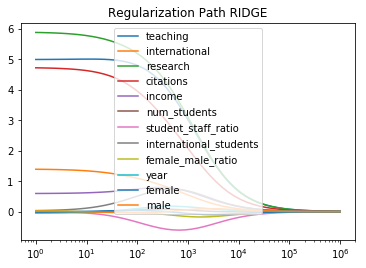

Text(0.5,1,'Regularization Path RIDGE of country coefs')

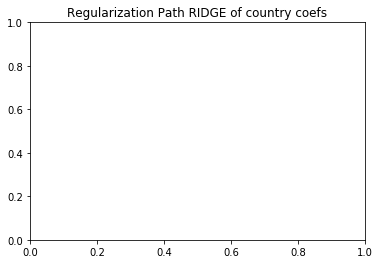

In [15]:
from sklearn.linear_model import Ridge
import matplotlib.pylab as plt
names_regressors = nuevo_df.drop(["total_score","world_rank","university_name"],axis=1).columns
alphas_ = np.logspace(0,6,base=10)
coefs = []
model = Ridge(fit_intercept=True,solver='svd')
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    coefs.append(model.coef_)
ax = plt.gca()
for y_arr, label in zip(np.squeeze(coefs).T, names_regressors):
    if "country" not in label:
        plt.plot(alphas_, y_arr, label=label)
ax.set_xscale('log')
plt.title('Regularization Path RIDGE')
plt.legend()
plt.show()
...#modify
if "country" in label:
    plt.plot(alphas_, y_arr, label=label)
plt.title('Regularization Path RIDGE of country coefs')

En el gráfico Regularization Path RIDGE donde no se incluyen las ciudades, se puede ver que a medida que aumenta el parámetro de regularización los coeficientes tienden a reducirse hasta que cuando el parámetro es muy grande, la cantidad de coeficientes se reduce a 0. Existen variables que varían su comportamiento respecto al resto, como lo es "student_stuff_ratio" e "international_students". "student_stuff_ratio" muestra un extraño comportamiento de ir a números negativos pero finalmente vuelve a 0, e "international_students" aumenta un poco para luego caer a 0.

j) Se utiliza el método "Lasso" para ajuste de modelo lineal.

In [16]:
from sklearn.linear_model import Lasso
alphas_ = np.logspace(0,6,base=10)
model = Lasso(fit_intercept=True)
###
country_alphas_ = np.logspace(-5,0,base=10)

La técnica lasso o norma l1 tiene una importante característica: tiene integrada la selección de atributos. Esta característica permite que sea inherentemente mejor en la selección de atributos que la norma l2.

k) En esta sección se elige el método "Lasso" debido a lo enunciado anteriormente: es un método que incluye la selección de atributos, por lo cuál es una mejor opción para determinarlos.

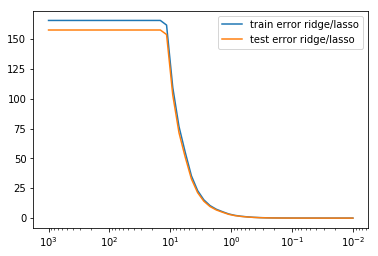

In [17]:
alphas_ = np.logspace(-2,3,base=10)
coefs = []
model = Lasso(fit_intercept=True)
mse_test = []
mse_train = []
for a in alphas_:
    model.set_params(alpha=a)
    model.fit(X_train_scaled, y_train)
    yhat_train = model.predict(X_train_scaled)
    yhat_test = model.predict(X_test_scaled)
    mse_train.append(np.mean(np.power(yhat_train - y_train, 2)))
    mse_test.append(np.mean(np.power(yhat_test - y_test, 2)))
ax = plt.gca()
ax.plot(alphas_,mse_train,label='train error ridge/lasso')
ax.plot(alphas_,mse_test,label='test error ridge/lasso')
plt.legend(loc=1)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

Se puede notar que el método "Lasso"con un número grande del parámetro de regularización posee un error bastante grande que luego de cierto punto decae rápidamente y se acerca a 0. Esto indíca que el método "Lasso" funciona bastante bien con un parámetro de regularización pequeño.

<a id="refs"></a>
## Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] Ethem Alpaydin. *Machine Learning*. 2014.  
[3] Bentley, P. and Nordehn, G. and Coimbra, M. and Mannor (2011) , Classifying Heart Sounds Challenge,
CHSC2011, http://www.peterjbentley.com/heartchallenge/index.html  
[4] https://www.kaggle.com/toregil/new-labels-for-set-a  
[5] https://en.wikipedia.org/wiki/Fourier transform  
[6] https://www.kaggle.com/primaryobjects/voicegender/data  
[7] Gamit, M. R., Dhameliya, P. K., & Bhatt, N. S. (2015). Classification Techniques for Speech Recognition:
A Review. vol, 5, 58-63.  
[8] www.figure-eight.com/  
[9] https://machinelearningmastery.com/develop-word-embeddings-python-gensim/, https://radimrehurek.com/gensim/models/word2vec.html or https://nathanrooy.github.io/posts/2018-03-22/word2vec-from-scratch-with-python-and-numpy/  
[10] https://towardsdatascience.com/another-twitter-sentiment-analysis-with-python-part-6-doc2vec-603f11832504